### This model uses the diffraction from overlapping sample regions to solve the inversion symmetry problem and improve reconstruction quality

misc notes:

clearing gpu memory: `for i in $(sudo lsof /dev/nvidia0 | grep python | awk '{print $2}' | sort -u); do sudo kill -9 $i; done`
https://github.com/tensorflow/tensorflow/issues/36465

In [1]:
def init():
    from ptycho import params as p
    p.cfg['positions.provided'] = False
    p.cfg['data_source'] = 'experimental'
    p.cfg['set_phi'] = True
    p.cfg['nepochs'] = 60

    p.cfg['offset'] = 4
    p.cfg['max_position_jitter'] = 10
    p.cfg['output_prefix'] = 'experimental_test'

    p.cfg['gridsize'] = 2
    p.cfg['n_filters_scale'] = 2
    p.cfg['object.big'] = True
    p.cfg['intensity_scale.trainable'] = True
    
    p.cfg['outer_offset_train'] = 8
    p.cfg['outer_offset_test'] = 20
    p.cfg['nimgs_train'] = 2
    p.cfg['nimgs_test'] = 2
    
init()
from ptycho.evaluation import save_metrics
from ptycho.evaluation import trim
from ptycho import tf_helper as hh

2023-08-01 09:07:21.960421: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-01 09:07:22.041215: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-01 09:07:22.416736: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ollie/anaconda3/envs/tf/lib/
2023-08-01 09:07:22.416780: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.

In [1]:
%matplotlib inline

import os
from ptycho import tf_helper as hh
from ptycho import fourier as f
from ptycho import datasets
from ptycho.params import cfg
from ptycho.params import params

from sklearn.utils import shuffle

from importlib import reload
import os

import tensorflow as tf

import tensorflow_addons as tfa

import importlib
import matplotlib.pyplot as plt
import matplotlib

import numpy as np
# from tqdm.notebook import tqdm as tqdm

from tensorflow.keras.layers import Layer
from math import pi
from tensorflow.keras import backend as K

matplotlib.rcParams['font.size'] = 12

2023-05-08 18:30:24.186247: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 18:30:24.274596: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-08 18:30:24.607111: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ollie/anaconda3/envs/tf/lib/:/home/ollie/anaconda3/envs/tf/lib/
2023-05-08 18:30:24.607153: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin

In [ ]:
from importlib import reload
import matplotlib.pyplot as plt

from ptycho import params as p
from ptycho import generate_data as init
# from ptycho import train

In [ ]:
from ptycho import params as p
p.cfg['offset'] = 4
p.cfg['max_position_jitter'] = 10

p.cfg['gridsize'] = 2
p.cfg['n_filters_scale'] = 2
p.cfg['object.big'] = True
p.cfg['intensity_scale.trainable'] = True

from ptycho import train, model
# reload(model)
# reload(train)

# print(p.cfg)
from ptycho.train import *

  0%|          | 0/161 [00:00<?, ?it/s]

101
(16100, 64, 64, 1) (3600, 64, 64, 1)
Loading result from disk cache.
Loading result from disk cache.
Loading result from disk cache.
Loading result from disk cache.
1.0000108
nphoton 8.997947
discarding length 0 from test image
input shape (None, 64, 64, 1)
Instructions for updating:
Please pass an integer value for `reinterpreted_batch_ndims`. The current behavior corresponds to `reinterpreted_batch_ndims=tf.size(distribution.batch_shape_tensor()) - 1`.
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 64, 64, 4)]  0           []                               
                                                                                                  
 input_positions (InputLayer)   [(None, 1, 2, 4)]    0           []                               
                           

2023-08-01 09:08:56.177948: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-08-01 09:08:56.177962: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-08-01 09:08:56.177982: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1664] Profiler found 1 GPUs
2023-08-01 09:08:56.179253: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so.11.2'; dlerror: libcupti.so.11.2: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ollie/anaconda3/envs/tf/lib/
2023-08-01 09:08:56.231240: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-08-01 09:08:56.231367: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


Epoch 1/60
input shape (None, 64, 64, 1)
input shape (None, 64, 64, 1)


2023-08-01 09:08:58.852122: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-08-01 09:08:59.951381: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x724e400


161/161 [==============================] - 6s 16ms/step - loss: 1129473280.0000 - maps_loss: 0.1232 - maps_1_loss: 43.5005 - distribution_lambda_loss: 1129473280.0000 - maps_2_loss: 0.0200 - val_loss: 990081536.0000 - val_maps_loss: 0.0889 - val_maps_1_loss: 46.9137 - val_distribution_lambda_loss: 990081536.0000 - val_maps_2_loss: 0.0203 - lr: 0.0010
Epoch 2/60
161/161 [==============================] - 2s 12ms/step - loss: 520008512.0000 - maps_loss: 0.1965 - maps_1_loss: 37.9231 - distribution_lambda_loss: 520008512.0000 - maps_2_loss: 0.0200 - val_loss: 392115104.0000 - val_maps_loss: 0.2162 - val_maps_1_loss: 34.0610 - val_distribution_lambda_loss: 392115104.0000 - val_maps_2_loss: 0.0203 - lr: 0.0010
Epoch 3/60
161/161 [==============================] - 2s 12ms/step - loss: 240570592.0000 - maps_loss: 0.2247 - maps_1_loss: 29.2415 - distribution_lambda_loss: 240570592.0000 - maps_2_loss: 0.0200 - val_loss: 191585152.0000 - val_maps_loss: 0.2261 - val_maps_1_loss: 28.7450 - val_dis

In [2]:
!nvidia-smi

/bin/bash: /home/ollie/anaconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Mon May  8 18:30:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.105.01   Driver Version: 515.105.01   CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:04:00.0 Off |                  N/A |
|  0%   50C    P2   128W / 420W |    534MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+------------------

### Some training and probe parameters

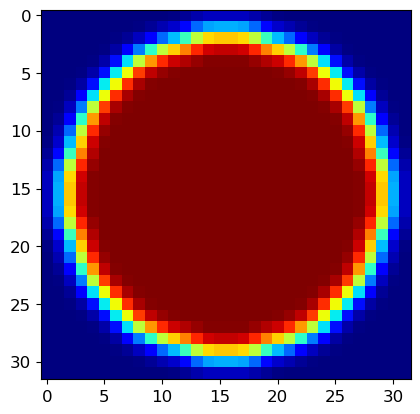

In [3]:
h = w = N = cfg['N'] = 64
# offset between neighboring scan points, in pixels
offset = cfg['offset'] = 4
gridsize = cfg['gridsize'] = 2

nepochs=20
#wt_path = 'wts4' #Where to store network weights
# wt_path = 'wts4.1'
batch_size = cfg['batch_size'] = 16

filt = f.lowpass_g(.55, np.ones(N), sym = True)
#filt = f.lowpass_g(.7, np.ones(N), sym = True)

# TODO assert symmetry
probe = f.gf(((np.einsum('i,j->ij', filt, filt)) > .5).astype(float), 1) + 1e-9
probe_small = probe[16:-16, 16:-16]
tprobe = (tf.convert_to_tensor(probe, tf.float32)[..., None])
cfg['probe'] = tprobe
tprobe_small = (tf.convert_to_tensor(probe_small, tf.float32)[..., None])

# if (not os.path.isdir(path+wt_path)):
#     os.mkdir(wt_path)

plt.imshow(tprobe_small, cmap = 'jet')

### Load experimental dataset

  0%|          | 0/161 [00:00<?, ?it/s]

101
(16100, 64, 64, 1) (3600, 64, 64, 1)


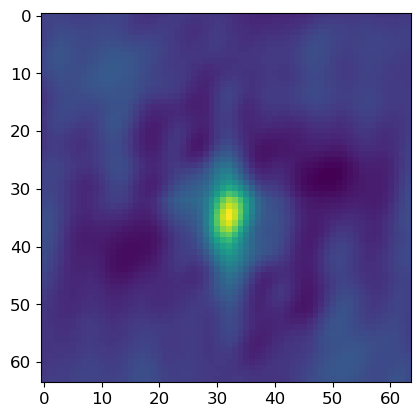

In [4]:
#from ptycho.experimental import *
from ptycho import experimental

### Simulate ptychography data

Sampling on regular grid
shape (1, 272, 272, 1)
input shape (None, 64, 64, 1)
Instructions for updating:
Please pass an integer value for `reinterpreted_batch_ndims`. The current behavior corresponds to `reinterpreted_batch_ndims=tf.size(distribution.batch_shape_tensor()) - 1`.
Sampling on regular grid
shape (1, 248, 248, 1)


(TensorShape([121, 64, 64, 4]), (10609, 64, 64, 4))

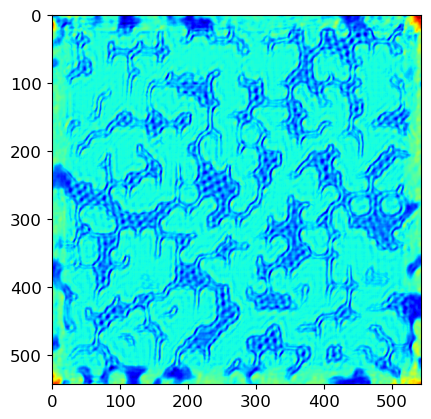

In [8]:
plt.imshow(experimental.inverted_patches_I[0, :, :, 0], cmap = 'jet')
#plt.imshow(inverted_patches_phi[0, :, :, 0], cmap = 'jet')

cfg['bigoffset'] = 4
X_train, Y_I_train, Y_phi_train, intensity_scale, _Y_I_train_full, _, (coords_nominal_train, coords_true_train) = datasets.mk_expdata('train', probe)
cfg['intensity_scale'] = intensity_scale

cfg['bigoffset'] = ((gridsize - 1) * offset + N // 2)# // 2
bigN = N + (gridsize - 1) * offset
X_test, Y_I_test, Y_phi_test, _, _Y_I_test_full, norm_Y_I_test, (coords_nominal_test, coords_true_test) = datasets.mk_expdata('test', probe, intensity_scale)

# TODO shuffle should be after flatten
X_train, Y_I_train, Y_phi_train = shuffle(X_train.numpy(), Y_I_train.numpy(), Y_phi_train.numpy(), random_state=0)

(Y_I_test).shape, Y_I_train.shape

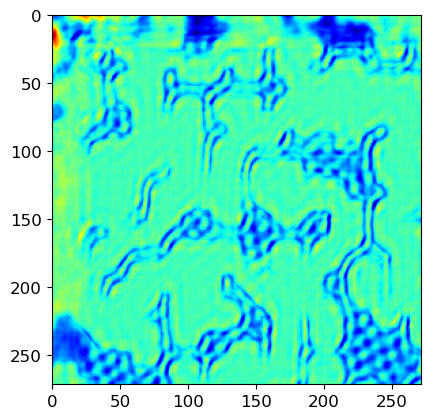

In [9]:
plt.imshow(_Y_I_train_full[0], cmap = 'jet')

In [10]:
print('intensity scale:', intensity_scale, '\n',
      'max photon count:', (np.max(Y_I_train, axis = (1, 2, 3)).mean() * intensity_scale)**2, '\n',
      'shapes:', (Y_phi_test).shape, (Y_I_test).shape, Y_I_train.shape)

intensity scale: 1700.7429 
 max photon count: 2564622.0062185675 
 shapes: (121, 64, 64, 4) (121, 64, 64, 4) (10609, 64, 64, 4)


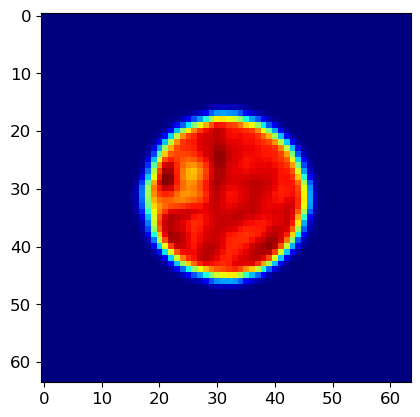

In [11]:
plt.imshow(Y_I_train[0, :, :, 0], cmap = 'jet')

### Norm conservation consistency check:

In [12]:
print(np.linalg.norm(X_train[0]) /  np.linalg.norm(Y_I_train[0]))

def normed_ff_np(arr):
    return (f.fftshift(np.absolute(f.fft2(np.array(arr)))) / np.sqrt(h * w))

1.0000001


### Inversion symmetry check:

In [13]:
assert np.isclose(normed_ff_np(Y_I_train[0, :, :, 0]),
            tf.math.conj(normed_ff_np(Y_I_train[0, ::-1, ::-1, 0])), atol = 1e-6).all()

#normed_ff_np(Y_I_train[0, :, :, 0]).sum() / normed_ff_np(Y_I_train[0, :, :, 0]).sum()

### np / tf consistency check:

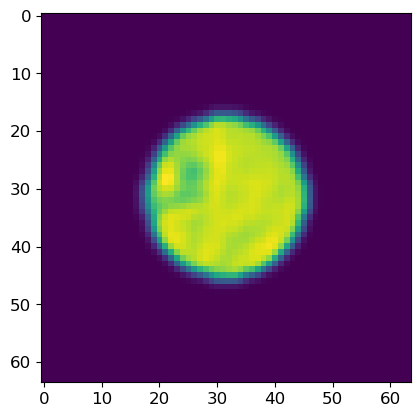

In [14]:
plt.imshow(Y_I_train[0, :, :, 0])

### Number of photons consitency check

In [12]:
np.log10(np.sum((X_train[:, :, :] * intensity_scale)**2, axis = (1, 2))).mean()

8.997815

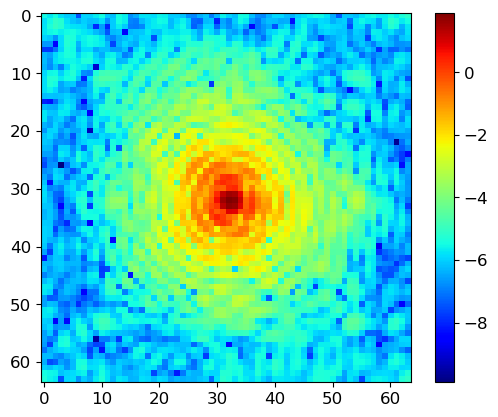

In [13]:
i = 1

plt.imshow(np.log(normed_ff_np
                  (np.array(hh.combine_complex(Y_I_train, Y_phi_train))[0, :, :, 0])), cmap = 'jet')
plt.colorbar()

/tmp/ipykernel_1121358/2642748978.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(X_train[0, :, :, 0]), cmap = 'jet')


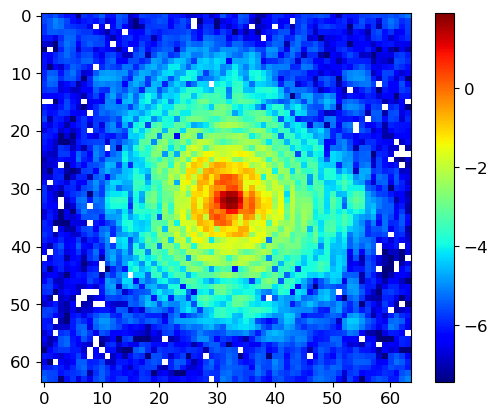

In [14]:
plt.imshow(np.log(X_train[0, :, :, 0]), cmap = 'jet')
plt.colorbar()

## Define the network structure

In [15]:
plt.rcParams["figure.figsize"] = (10, 10)

In [16]:
from ptycho import model

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 64, 64, 4)]  0           []                               
                                                                                                  
 intensity_scaler (IntensitySca  (None, 64, 64, 4)   1           ['input[0][0]']                  
 ler)                                                                                             
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   2368        ['intensity_scaler[0][0]']       
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 64)   36928       ['conv2d[0][0]']           

 distribution_lambda (Distribut  ((None, 64, 64, 4),  0          ['intensity_scaler_inv[0][0]']   
 ionLambda)                      (None, 64, 64, 4))                                               
                                                                                                  
Total params: 4,397,955
Trainable params: 4,393,858
Non-trainable params: 4,097
__________________________________________________________________________________________________
None


In [17]:
model.params()['intensity_scale']

1698.6838

In [18]:
model.p.cfg['intensity_scale.trainable'] = True # TODO is this crucial? (yes i think)
reload(model)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 64, 64, 4)]  0           []                               
                                                                                                  
 intensity_scaler (IntensitySca  (None, 64, 64, 4)   1           ['input[0][0]']                  
 ler)                                                                                             
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   2368        ['intensity_scaler[0][0]']       
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 64)   36928       ['conv2d[0][0]']           

 distribution_lambda (Distribut  ((None, 64, 64, 4),  0          ['intensity_scaler_inv[0][0]']   
 ionLambda)                      (None, 64, 64, 4))                                               
                                                                                                  
Total params: 4,397,955
Trainable params: 4,393,859
Non-trainable params: 4,096
__________________________________________________________________________________________________
None


<module 'ptycho.model' from '/home/ollie/Documents/scratch/ptycho/notebooks/ptycho/model.py'>

In [19]:
history = model.train(20, X_train, coords_nominal_train, Y_I_train)


Epoch 1/20


2023-02-27 20:27:37.464078: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x8242070
2023-02-27 20:27:38.244373: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


630/630 [==============================] - 12s 14ms/step - loss: 545106240.0000 - trimmed_obj_loss: 0.1226 - pred_diff_channels_loss: 95.7494 - distribution_lambda_loss: 545106240.0000 - probe_illumination_loss: 0.0060 - val_loss: 344698432.0000 - val_trimmed_obj_loss: 0.1256 - val_pred_diff_channels_loss: 95.7087 - val_distribution_lambda_loss: 344698432.0000 - val_probe_illumination_loss: 0.0060 - lr: 0.0010
Epoch 2/20
630/630 [==============================] - 8s 12ms/step - loss: 308998464.0000 - trimmed_obj_loss: 0.1279 - pred_diff_channels_loss: 95.7484 - distribution_lambda_loss: 308998464.0000 - probe_illumination_loss: 0.0060 - val_loss: 285929792.0000 - val_trimmed_obj_loss: 0.1357 - val_pred_diff_channels_loss: 95.7082 - val_distribution_lambda_loss: 285929792.0000 - val_probe_illumination_loss: 0.0060 - lr: 0.0010
Epoch 3/20
630/630 [==============================] - 8s 12ms/step - loss: 253843552.0000 - trimmed_obj_loss: 0.1416 - pred_diff_channels_loss: 95.7490 - distribu

In [20]:
b, a, reg, L2_error = model.autoencoder.predict([X_test * model.params()['intensity_scale'],
                                                coords_nominal_test])

4/4 [==============================] - 1s 102ms/step


In [19]:
# %timeit diffraction_to_obj.predict([X_test])

In [ ]:
%timeit autoencoder.predict([X_test])

In [21]:
# from ptycho import evaluation
# reload(evaluation)

# evaluation.plt_metrics(history)

phase min: -3.0246441 phase max: 0.0


/home/ollie/Documents/scratch/ptycho2/ptycho/notebooks/ptycho/evaluation.py:57: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(X_test)[i, :, :, channel], cmap = 'jet')


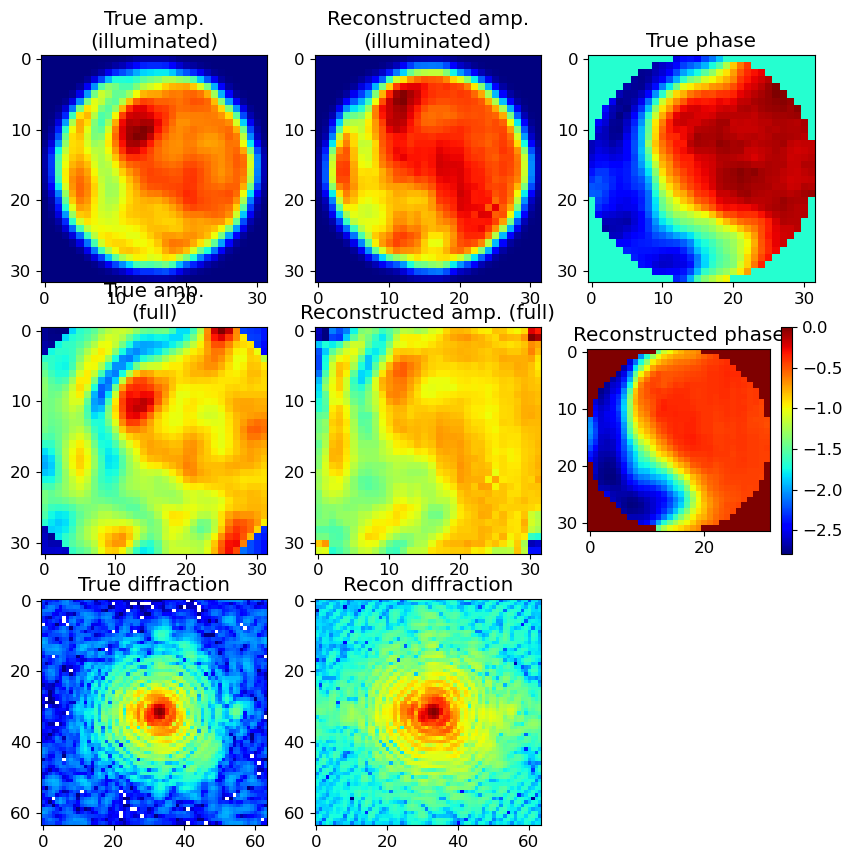

In [20]:
from ptycho import evaluation
#plt_metrics()
evaluation.summarize(10, a, b, X_test, Y_I_test, Y_phi_test, probe, 0)

## Evaluate resolution

In [28]:
# np.random.seed(2)
# Y_I_2, Y_phi_2, _Y_I_full_2 = simulate_objects(12)

# line = np.zeros_like(Y_I_2)
# line[:, 31, :, :] = .1
# line = f.gf(line, (0, 1, 1, 0))

# X_2, Y_I_2, Y_phi_2, _ =\
#     illuminate_and_diffract(Y_I_2 + line, Y_phi_2, intensity_scale = intensity_scale)

# plt.imshow((Y_I_2 - Y_I_test)[0, :, :, 0])
# plt.colorbar()

# b2, _, _, _ = autoencoder.predict([X_2])
# difference = np.real(b2 - b).mean(axis = 0)

# plt.imshow(difference, cmap = 'jet')

# lineout_orig = line[0, :, :, 0].sum(axis = 1)
# lineout_recon = difference[:, :, 0].sum(axis = 1)

In [29]:
# %matplotlib inline
# #plt.plot(lineout_orig)
# plt.plot(lineout_recon)
# plt.grid()

In [30]:
# plt.plot(np.abs(f.fftshift(f.fft(lineout_recon)))[32:])
# # plt.plot(np.abs(f.fftshift(f.fft(lineout_orig)))[32:])
# plt.grid()

In [31]:
# lineout_orig = line[0, :, :, 0].sum(axis = 1)

# lineout_recon = difference[:, :, 0].sum(axis = 1)

# plt.plot(lineout_orig)
# plt.plot(lineout_recon)

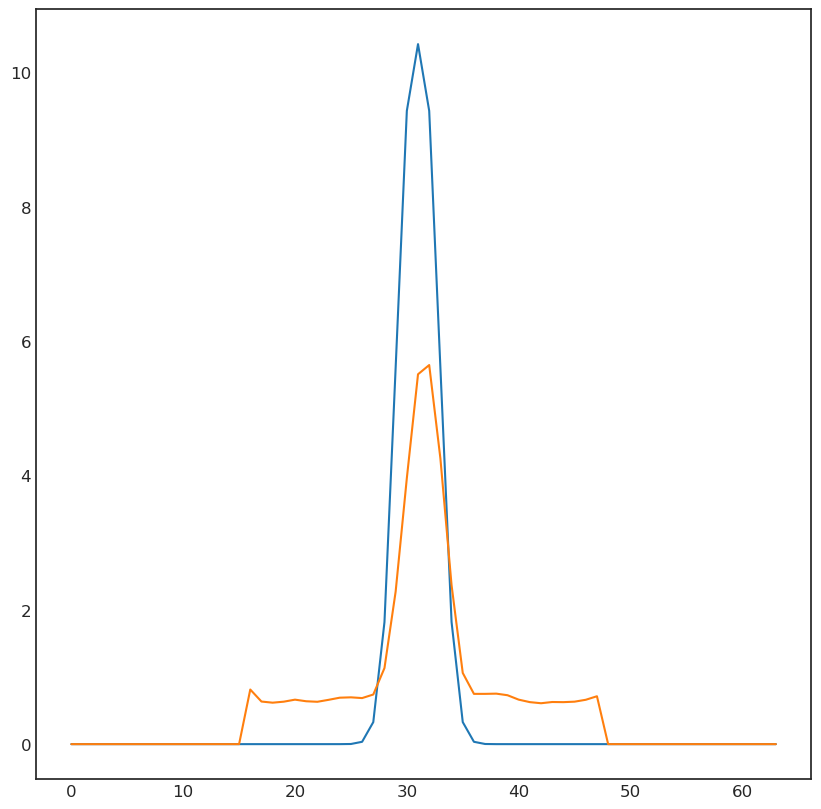

In [97]:
lineout_orig = line[0, :, :, 0].sum(axis = 1)

lineout_recon = difference[:, :, 0].sum(axis = 1)

plt.plot(lineout_orig)
plt.plot(lineout_recon)

In [22]:
from ptycho import baselines as bl

In [23]:
big_gridsize = 10
bigoffset = params()['bigoffset']

bordersize = N // 2 - bigoffset // 4
clipsize = (bordersize + ((gridsize - 1) * offset) // 2)

def stitch(b, norm_Y_I_test = 1, nsegments = big_gridsize * 2 - 1):
    img_recon = np.reshape((norm_Y_I_test * np.absolute(b)), (-1, nsegments,
                                                              nsegments, 64, 64, 1))
    img_recon = img_recon[:, :, :, bordersize: -bordersize, bordersize: -bordersize, :]
    tmp = img_recon.transpose(0, 1, 3, 2, 4, 5)
    stitched = tmp.reshape(-1, np.prod(tmp.shape[1:3]), np.prod(tmp.shape[1:3]), 1)
    return stitched

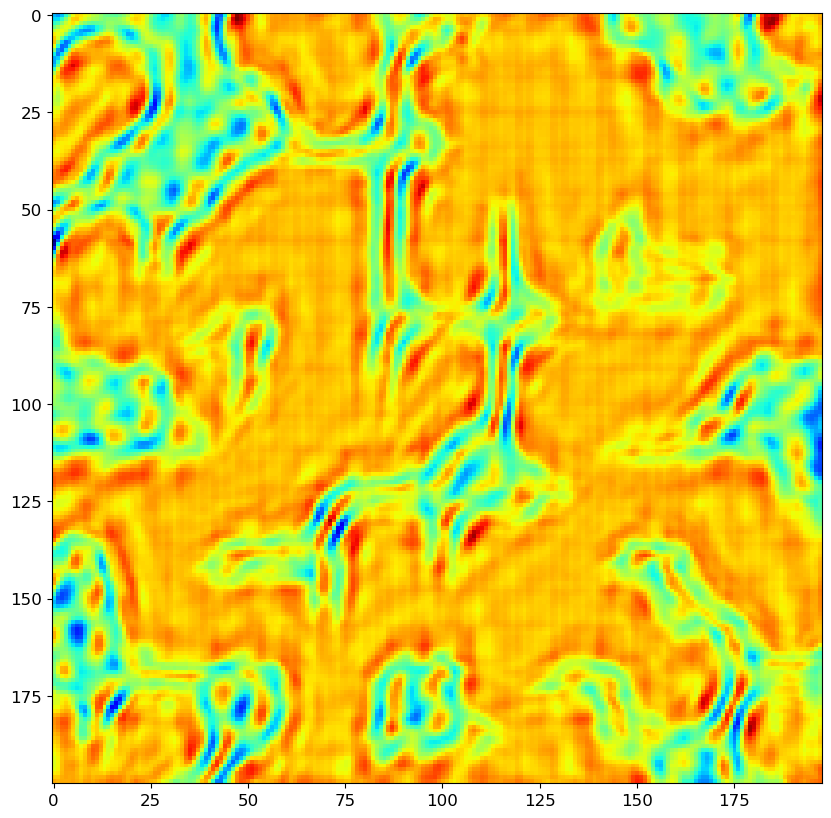

In [24]:
bordersize = N // 2 - bigoffset // 4
clipsize = (bordersize + ((gridsize - 1) * offset) // 2)

plt.imshow(_Y_I_test_full[0, clipsize: -clipsize, clipsize: -clipsize], interpolation = 'none',
          cmap = 'jet')
vmin = np.min(_Y_I_test_full[0, clipsize: -clipsize, clipsize: -clipsize])
vmax = np.max(_Y_I_test_full[0, clipsize: -clipsize, clipsize: -clipsize])

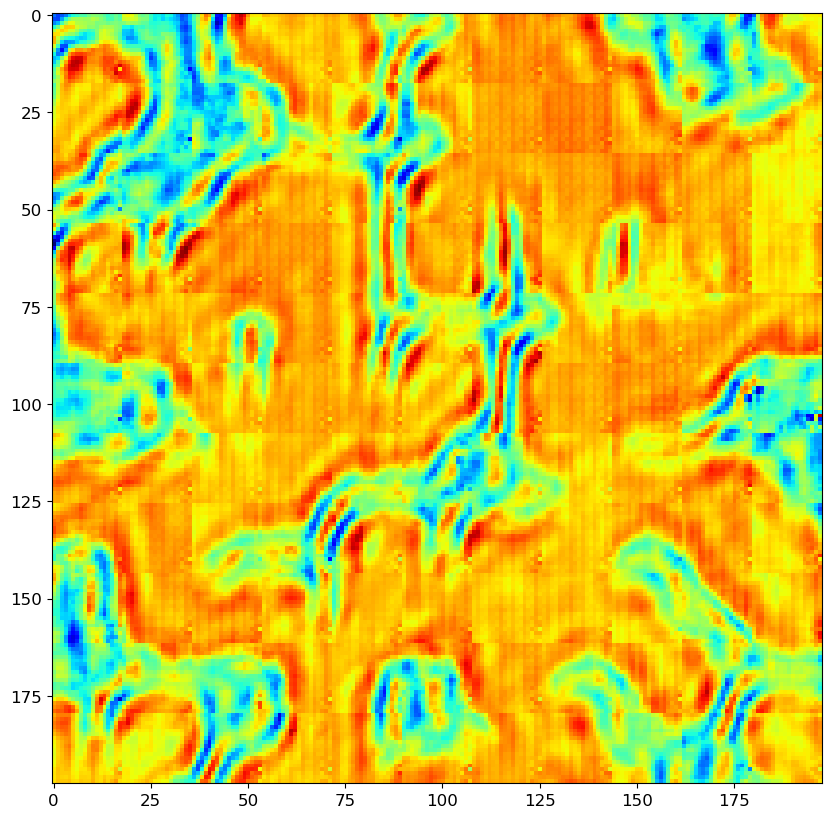

In [26]:
plt.rcParams["figure.figsize"] = (10, 10)

stitched = stitch(b, 1, nsegments=11)
#stitched = stitch(b, norm_Y_I_test, nsegments=11)

# plt.imshow(stitched[0], interpolation = 'none', vmin = vmin, vmax = vmax, cmap = 'jet')
plt.imshow(stitched[0], interpolation = 'none', cmap = 'jet')

In [31]:
reload(bl)

<module 'ptycho.baselines' from '/home/ollie/Documents/scratch/ptycho/notebooks/ptycho/baselines.py'>

In [32]:
baseline_model = bl.train((X_train[:, :, :, :1]), Y_I_train[:, :, :, :1], Y_phi_train[:, :, :, :1])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   640         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 64)   36928       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 32, 32, 64)   0           ['conv2d_1[0][0]']               
                                                                                              

Epoch 44/60
315/315 [==============================] - 6s 20ms/step - loss: 0.0533 - conv2d_12_loss: 0.0029 - conv2d_19_loss: 0.0504 - val_loss: 0.0735 - val_conv2d_12_loss: 0.0035 - val_conv2d_19_loss: 0.0700 - lr: 5.0000e-04
Epoch 45/60
315/315 [==============================] - 6s 20ms/step - loss: 0.0531 - conv2d_12_loss: 0.0029 - conv2d_19_loss: 0.0502 - val_loss: 0.0744 - val_conv2d_12_loss: 0.0035 - val_conv2d_19_loss: 0.0708 - lr: 5.0000e-04
Epoch 46/60
313/315 [============================>.] - ETA: 0s - loss: 0.0530 - conv2d_12_loss: 0.0029 - conv2d_19_loss: 0.0501
Epoch 46: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
315/315 [==============================] - 6s 20ms/step - loss: 0.0530 - conv2d_12_loss: 0.0029 - conv2d_19_loss: 0.0501 - val_loss: 0.0749 - val_conv2d_12_loss: 0.0036 - val_conv2d_19_loss: 0.0713 - lr: 5.0000e-04
Epoch 47/60
315/315 [==============================] - 6s 20ms/step - loss: 0.0474 - conv2d_12_loss: 0.0026 - conv2d_19_loss: 

4/4 [==============================] - 0s 7ms/step


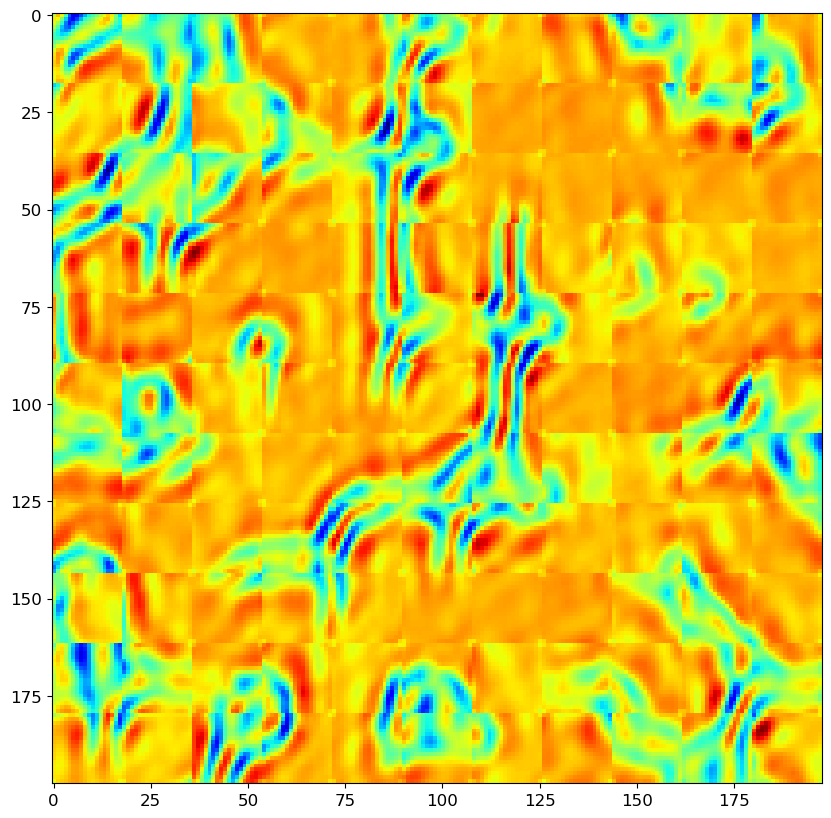

In [30]:
baseline_pred_I, baseline_pred_phi = baseline_model.predict([X_test[:, :, :, 0] * model.params()['intensity_scale']])
baseline_stitched = stitch(baseline_pred_I, 1, nsegments=11)

plt.imshow(baseline_stitched[0], cmap = 'jet')#, vmin = vmin, vmax = vmax)

In [85]:
gt = _Y_I_test_full[:, clipsize: -clipsize, clipsize: -clipsize]
tf.keras.losses.MeanAbsoluteError()(gt, stitched)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0040464187>

In [86]:
tf.keras.losses.MeanSquaredError()(gt, stitched)

<tf.Tensor: shape=(), dtype=float32, numpy=3.37226e-05>

In [87]:
tf.keras.losses.MeanAbsoluteError()(gt, baseline_stitched)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0077292537>

In [88]:
tf.keras.losses.MeanSquaredError()(gt, baseline_stitched)

<tf.Tensor: shape=(), dtype=float32, numpy=0.00013008271>

In [89]:
baseline_model.evaluate([X_test[:, :, :, 0]])

4/4 [==============================] - 0s 806us/step - loss: 0.0000e+00 - conv2d_12_loss: 0.0000e+00 - conv2d_19_loss: 0.0000e+00


[0.0, 0.0, 0.0]

In [90]:
i = 0
# consistency check: should be close to equal
np.sum(tf.math.abs(a[i])**2), np.sum(tf.math.abs(X_test[i])**2),\
np.sum(tf.math.abs(a)**2), np.sum(tf.math.abs(X_test)**2)

(1296.268, 1232.1055, 163924.03, 164390.33)

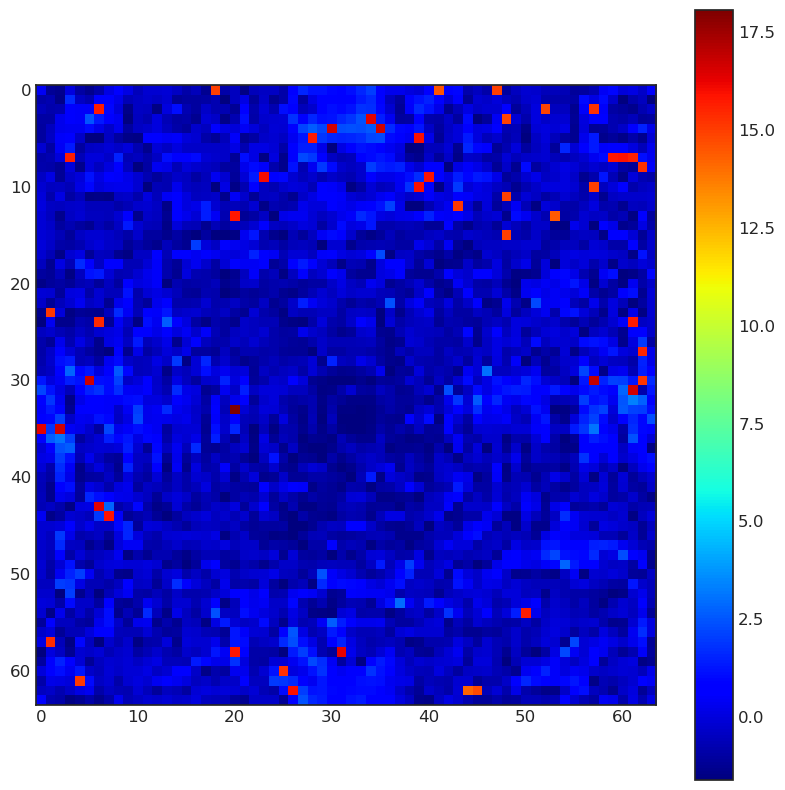

In [91]:
plt.imshow(np.log(.2 + np.abs((a[i, :, :, 0] - X_test[i, :, :, 0]) / (X_test[i, :, :, 0] + 1e-9))), cmap ='jet')
plt.colorbar()

In [93]:
# off = 1
# vmin = 0
# vmax = 1

# aa, bb = 1, 2
# plt.subplot(aa, bb, 1)
# plt.title('Ground truth amp.')
# cropshow((Y_I_test[i, :, :, 0]), cmap = 'jet', vmin = vmin, vmax = vmax)

# plt.subplot(aa, bb, 2)
# plt.title('Reconstructed amp.')
# cropshow((np.absolute(b))[i, :, :, 0], cmap = 'jet', vmin = vmin, vmax = vmax)

In [95]:
# !ln ../xrd_clustering/notebooks/visualization.py
from ptycho import visualization as vis
reload(vis)

<module 'ptycho.visualization' from '/home/ollie/Documents/scratch/ptycho/ptycho/visualization.py'>

diffraction reconstruction


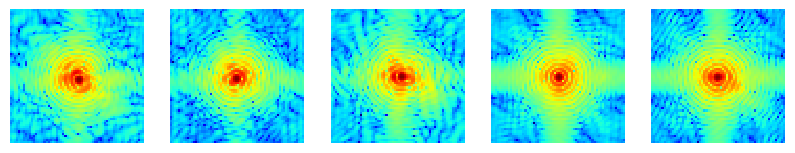

diffraction ground truth


/tmp/ipykernel_671127/1178352548.py:10: RuntimeWarning: divide by zero encountered in log
  vis.display_imgs(np.log(np.absolute(X_test[:, :, :, 0]))[i:i + off])


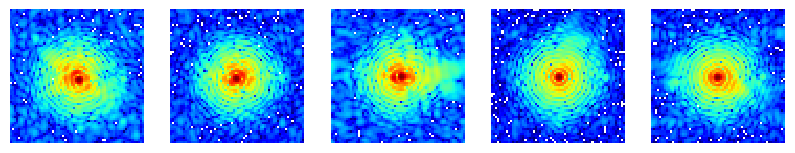

object reconstruction (amp)


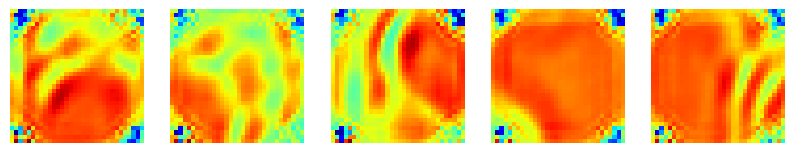

object ground truth


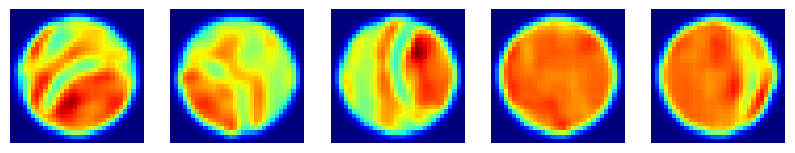

In [96]:
off = 5

vmin = np.min(Y_I_test[:, 16:-16, 16:-16][i:i + off])
vmax = np.max(Y_I_test[:, 16:-16, 16:-16][i:i + off])

print('diffraction reconstruction')
vis.display_imgs(np.log(np.absolute(a[:, :, :, 0]))[i:i + off])

print('diffraction ground truth')
vis.display_imgs(np.log(np.absolute(X_test[:, :, :, 0]))[i:i + off])

print('object reconstruction (amp)')
vis.display_imgs(np.absolute(b[:, 16:-16, 16:-16, 0])[i:i + off], vmin = vmin, vmax = vmax)
# print('object reconstruction (phase)')
# vis.display_imgs(np.angle(b[:, 16:-16, 16:-16, 0])[i:i + 10])#, vmin = vmin, vmax = vmax)
print('object ground truth')
vis.display_imgs(Y_I_test[:, 16:-16, 16:-16, 0][i:i + off], vmin = vmin, vmax = vmax)

## save model

In [249]:
history.history.keys()

dict_keys(['loss', 'pred_amplitude_loss', 'padded_obj_loss', 'pred_amplitude_1_loss', 'val_loss', 'val_pred_amplitude_loss', 'val_padded_obj_loss', 'val_pred_amplitude_1_loss', 'lr'])

In [250]:
np.save(path+'str_history', history.history)

In [251]:
# model.load_weights(checkpoint_filepath)

In [68]:
# val_losses=hist.history['val_loss']
# min_epoch=np.argmin(val_losses)+1
# print (min_epoch)
# np.save(path+'%s/min_epoch' %(wt_path), min_epoch)
autoencoder.save('{}.h5'.format(wt_path))